# Etapas que componen el proyecto

## Análisis inicial
En esta etapa se realizará una primera revisión de los datos que permita comprender cómo se componen los datasets y tener una noción general de la información

## Análisis exploratorio
Una vez cargada la información y tras realizar algunos planteamientos iniciales, se procederá a recorrer los datos en busca de posibles errores en la información que deban ser solucionados (tipo de objeto, formato, valores duplicados, valores ausentes) 

## Enriquecimiento de los datos
Luego de haber limpiado y organizado la información, se procederá a añadir campos que permitan o faciliten la resolución de dudas, preguntas e hipótesis con base en los datos iniciales

## Agrupación y análisis de datos
Después de haber tratado los datos correctamente, se procederá a agrupar la información de la manera más conveniente de tal modo que permita comenzar a responder los planteamientos y que se puedan comenzar a incluir gráficas que faciliten el análisis estadístico de la información

### Análisis estadístico de datos
### Perfiles de usuario por región
### Pruebas de hipótesis

## Conclusiones generales

# 
# Descripción de datos (Diccionario)
1. Name (Nombre)
2. Platform (Plataforma)
3. Year_of_Release (Año de lanzamiento)
4. Genre (Género) 
5. NA_sales (ventas en Norteamérica en millones de dólares estadounidenses) 
6. EU_sales (ventas en Europa en millones de dólares estadounidenses) 
7. JP_sales (ventas en Japón en millones de dólares estadounidenses) 
8. Other_sales (ventas en otros países en millones de dólares estadounidenses) 
9. Critic_Score (máximo de 100) 
10. User_Score (máximo de 10) 
11. Rating (ESRB)

# 1. Análisis inicial

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
from math import factorial, ceil
from matplotlib import pyplot as plt
import matplotlib as mpl

In [2]:
df = pd.read_csv("/datasets/games.csv")

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


In [3]:
print(df.head())

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


Comentarios:

Luego de cargar el dataset de trabajo se pudieron identificar los siguientes factores:
1. El DataFrame cuenta con un total de 16715 filas y 11 columnas
2. Excepto por las columnas Platform y las columnas de ventas por regiones (EU, NA, JP), se identificaron valores ausentes en todas las demás columnas. Se procederá a analizar los valores ausentes y rellenar o eliminar aquellos que se consideren pertinentes
3. No se puede identificar a simple vista si existen filas completamente duplicadas, por lo que se procederá también a revisar este posible problema. De igual manera se analizarán y manejarán valores duplicados específicos que sean encontrados
4. Se procederá a convertir todos los nombres de columna a minúsculas para facilitar su manipulación
5. Se procederá a revisar si el año de lanzamiento debe cambiarse de formato
6. Debido a que las puntuaciones (Critic, User) son valores de los cuales probablemente haya que obtener alguna estadistica, se procederá a convertirlos a tipo numerico. Adicionalmente, se estandarizarán ambas columnas para que sean mostradas en un rango de 1 a 10 para de esta manera poder representarlas en una misma escala
7. Los datos ausentes en la columna Rating serán reemplazados por TBD puesto que no hay ningún parámetro o criterio entre la información disponible para asignarles una categoría

# 2. Análisis exploratorio

In [4]:
df.columns = df.columns.str.lower()

print(df.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


In [5]:
df.dropna(subset = ["name"], inplace = True)
df.drop_duplicates(inplace = True)
df.reset_index(drop = True, inplace = True)

print(df.isna().sum())

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64


In [6]:
df.dropna(subset = ["year_of_release"], inplace = True)
df["year_of_release"] = df["year_of_release"].astype("int")

print(df.isna().sum())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64


In [7]:
df["user_score"] = pd.to_numeric(df["user_score"], errors = "coerce")
df["critic_score"] = df["critic_score"]/10

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB
None


In [8]:
df["rating"].fillna("TBD", inplace = True)

df["rating"].value_counts(dropna = False)

TBD     6676
E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

In [9]:
user_median = df["user_score"][df["user_score"] >= 0].median()
critic_median = df["critic_score"][df["critic_score"] >= 0].median()

df["user_score"].fillna(user_median, inplace = True)
df["critic_score"].fillna(critic_median, inplace = True)

print(df.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  
0     28.96      3.77         8.45           7.6         8.0      E  
1      3.58      6.81         0.77           7.1         7.5    TBD  
2     12.76      3.79         3.29           8.2         8.3      E  
3     10.93      3.28         2.95           8.0         8.0      E  
4      8.89     10.22         1.00           7.1         7.5    TBD  


Comentarios:

1. Los nombres de columnas fueron ajustados a minusculas
2. Las filas duplicadas fueron eliminadas
3. Los valores ausentes en la columna "year_of_release" fueron eliminados pues se considera que no son de utilidad al no poder agruparse por año de lanzamiento. Adicionalmente, se convirtieron todos los valores a tipo int, puesto que tener años como tipo float puede llevar a tener errores ya que los años sólo pueden ser numeros enteros
4. La columna "user_score" fue convertida a valores numéricos
5. Los valores ausentes en la columna Rating fueron reemplazados por TBD para poderlos agrupar
6. Los valores ausentes de las columnas score fueron rellenados con la mediana de los datos para no sesgar la muestra ni los datos

# 3. Enriquecimiento de los datos

In [10]:
def total_sales(data):
    na_sales = data["na_sales"]
    jp_sales = data["jp_sales"]
    eu_sales = data["eu_sales"]
    other_sales = data["other_sales"]
    
    total_sales = na_sales + jp_sales + eu_sales + other_sales
    
    return total_sales

df["total_sales"] = df.apply(total_sales, axis = 1)

print(df.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45           7.6         8.0      E   
1      3.58      6.81         0.77           7.1         7.5    TBD   
2     12.76      3.79         3.29           8.2         8.3      E   
3     10.93      3.28         2.95           8.0         8.0      E   
4      8.89     10.22         1.00           7.1         7.5    TBD   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4

# 4. Agrupación y análisis de datos

# 4.1 Análisis estadístico de datos

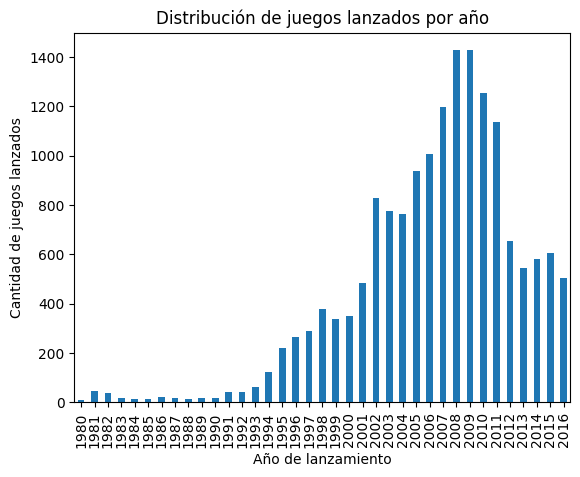

count      37.000000
mean      444.432432
std       451.604334
min         9.000000
25%        36.000000
50%       338.000000
75%       762.000000
max      1427.000000
Name: year_of_release, dtype: float64


In [11]:
# Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

df_releases = df["year_of_release"].value_counts().sort_index()

df_releases.plot(kind = "bar", xlabel = "Año de lanzamiento", ylabel = "Cantidad de juegos lanzados", title = "Distribución de juegos lanzados por año")
plt.show()

print(df_releases.describe())

Comentarios:

A partir de la distribución histórica de juegos lanzados por año se puede evidenciar que:

1. A partir del año 1995 se comenzó a ver un aumento progresivo en la cantidad de juegos lanzados cada año
2. Entre 2008 y 2011 se encuentran los años en los que más juegos se produjeron 
3. Depués del año 2011 se evidencia una notoria disminución en el lanzamiento de nuevos juegos
4. Dado que la media de juegos lanzados es de 445 juegos aproximadamente, se puede evidenciar que la cantidad de juegos lanzados antes de 1995 no es significativa

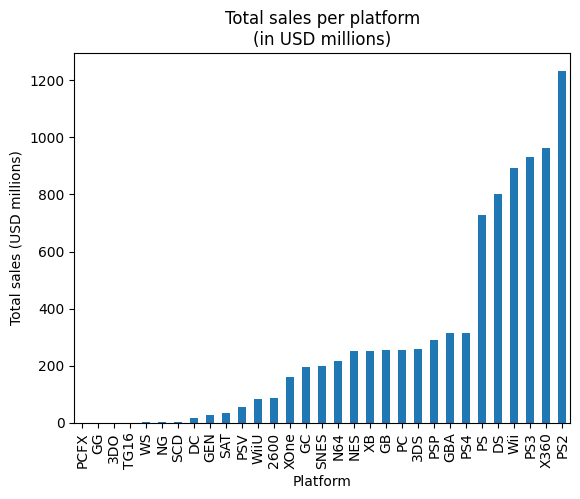

In [12]:
# Cómo varían las ventas de una plataforma a otra

df_platform = df.groupby("platform")["total_sales"].sum().sort_values()

df_platform.plot(kind = "bar", 
                 xlabel = "Platform", 
                 ylabel = "Total sales (USD millions)", 
                 title = "Total sales per platform\n(in USD millions)")
plt.show()

Comentarios:

A partir de la distribución anterior se puede identificar que las plataformas más populares hasta el momento son: PS2, X360, PS3, Wii, DS y PS

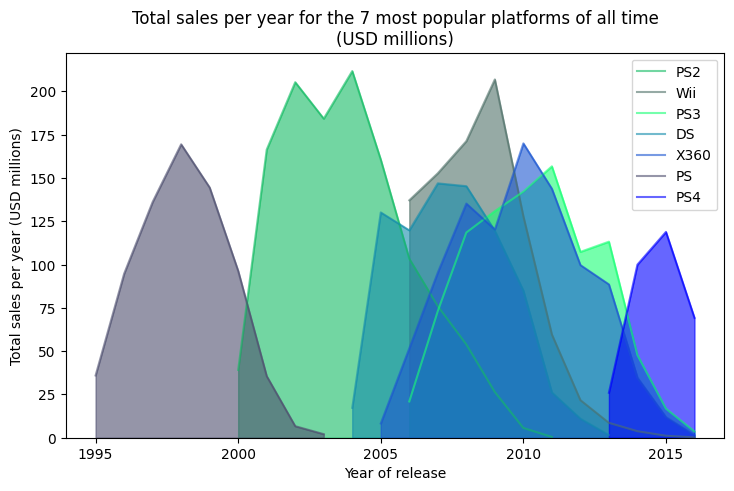

In [13]:
# Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año

colors = {"PS2":"#14bc64", "Wii":"#51726a", "PS3":"#19ff75", "DS":"#148dac", "X360":"#1c57d1", "PS":"#4e4f6f", "PS4":"b"}
names = ["PS2", "Wii", "PS3", "DS", "X360", "PS", "PS4"]

for name in names:
    df_names = df.query("platform == @name & year_of_release >= 1995").groupby(["year_of_release"]).sum()
    df_names["total_sales"].plot(kind ="area", alpha = 0.6, color = colors[name], figsize = (8.5,5))

plt.xlabel("Year of release")
plt.ylabel("Total sales per year (USD millions)")
plt.title("Total sales per year for the 7 most popular platforms of all time\n(USD millions)")
plt.legend(names)
plt.show() 

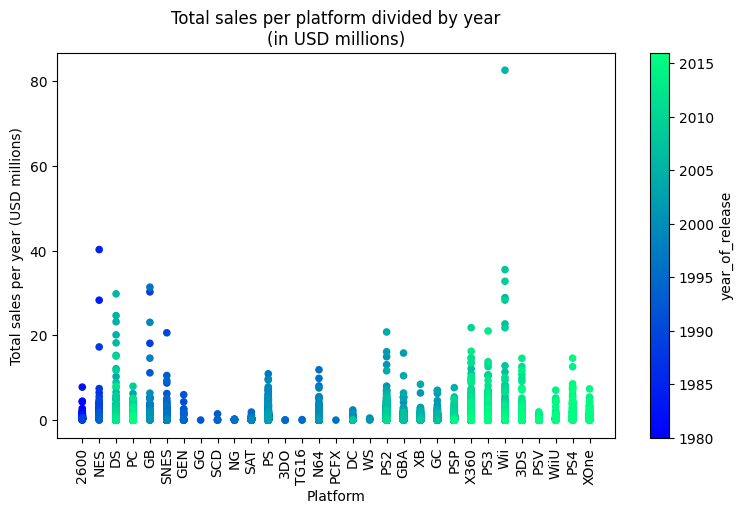

In [14]:
# Busca las plataformas que solían ser populares pero que ahora no tienen ventas

df.sort_values(by = ["year_of_release"]).plot(x = "platform", 
                                       y = "total_sales",
                                       kind = "scatter", 
                                       c = "year_of_release", 
                                       rot = 90, 
                                       colormap = "winter",
                                       legend =  True,
                                       xlabel = "Platform", 
                                       ylabel = "Total sales per year (USD millions)",
                                       title = "Total sales per platform divided by year\n(in USD millions)",
                                       figsize = (9,5))
plt.show()

Comentarios:

La distribución de ventas por año para cada plataforma permite evidenciar que actualmente las plataformas 2600, NES, GB, SNES, GEN, GG, SDC, NG, SAT, PS, 3DO, TG16, N64, PCFX Y DC han perdido toda su poularidad y no producen ventas desde antes del año 2000 o 2005 según sea el caso

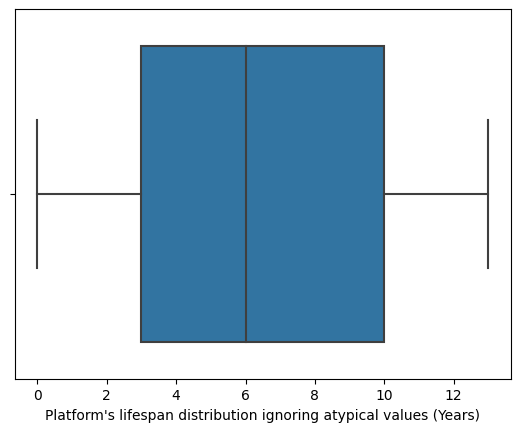

Tiempo promedio de popularidad de las plataformas: 6.1 años

platform
GG       0
PCFX     0
TG16     0
3DO      1
SCD      1
WS       2
NG       3
XOne     3
PS4      3
GEN      4
WiiU     4
PSV      5
3DS      5
SAT      5
N64      6
GC       6
GBA      7
XB       8
SNES     9
2600     9
PS       9
PS3     10
Wii     10
DC      10
PS2     11
NES     11
X360    11
PSP     11
GB      13
Name: year_of_release, dtype: int64


In [15]:
#¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

def platform_life (data):
    min_year = data.min()
    max_year = data.max()
    lifespan = max_year-min_year
    return lifespan


platform_life = df.groupby("platform")["year_of_release"].apply(platform_life).sort_values()

platform_life = platform_life[platform_life < 20]

sns.boxplot(platform_life, orient = "h")
plt.xlabel("Platform's lifespan distribution ignoring atypical values (Years)")
plt.show()

print(f"Tiempo promedio de popularidad de las plataformas: {round(platform_life.mean(),2)} años")
print()
print(platform_life)

Comentarios:

1. Para la representación de la distribución de los periodos de popularidad de las plataformas se descartaron PC y DS pues representaban valores atípicos dentro de la muestra
2. Se obtuvo un tiempo estimado de popularidad de aproximadamente 6 años por plataforma

In [16]:
# Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores
# Los datos deberían permitirte construir un modelo para 2017
#Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.

current_platforms = df[(df["year_of_release"] >= 2010) & (df["platform"].isin(['3DS', 'DS', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']))]

print(current_platforms.head())

                              name platform  year_of_release         genre  \
14              Kinect Adventures!     X360             2010          Misc   
16              Grand Theft Auto V      PS3             2013        Action   
23              Grand Theft Auto V     X360             2013        Action   
27     Pokemon Black/Pokemon White       DS             2010  Role-Playing   
29  Call of Duty: Modern Warfare 3     X360             2011       Shooter   

    na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
14     15.00      4.89      0.24         1.69           6.1         6.3   
16      7.02      9.09      0.98         3.96           9.7         8.2   
23      9.66      5.14      0.06         1.41           9.7         8.1   
27      5.51      3.17      5.65         0.80           7.1         7.5   
29      9.04      4.24      0.13         1.32           8.8         3.4   

   rating  total_sales  
14      E        21.82  
16      M        21.05  
23   

Comentarios:

A partir de las distribuciones anteriores se optó por trabajar unicamente con aquellas plataformas cuyas ventas se encuentran de 2010 en adelante, puesto que es un periodo que aún está dentro del rango esperado de popularidad de las plataformas y que además es un periodo que reúne varias de las plataformas más rentables y populares del momento

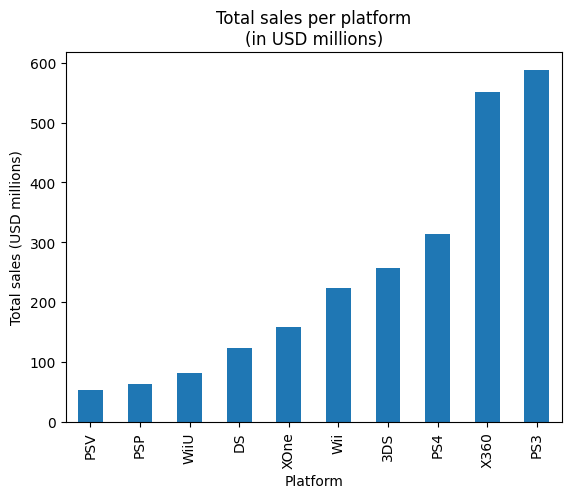

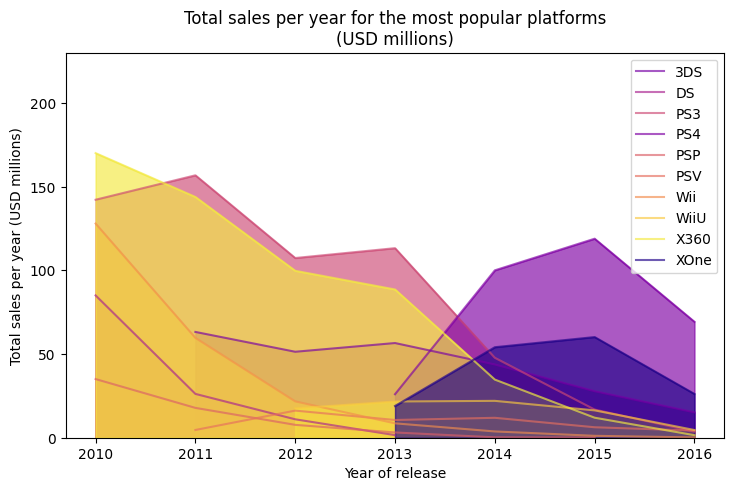

In [17]:
# ¿Qué plataformas son líderes en ventas? 
#¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

df_platform = current_platforms.groupby("platform")["total_sales"].sum().sort_values()

df_platform.plot(kind = "bar", 
                 xlabel = "Platform", 
                 ylabel = "Total sales (USD millions)", 
                 title = "Total sales per platform\n(in USD millions)")
plt.show()


colors = {'3DS':"#7700a5", 'DS':"#a92290", 'PS3':"#cd4a75", 'PS4':"#7f00a4", 'PSP':"#db5f67", 
          'PSV':"#e66e5e", 'Wii':"#f28c4d", 'WiiU':"#f9c83f", 'X360':"#f3e941", 'XOne':"#200389"}

names = ['3DS', 'DS', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']

for name in names:
    df_names = current_platforms.query("platform == @name").groupby(["year_of_release"]).sum()
    df_names["total_sales"].plot(kind ="area", color = colors[name], alpha = 0.65, ylim = [0,230], figsize = [8.5,5])

plt.xlabel("Year of release")
plt.ylabel("Total sales per year (USD millions)")
plt.title("Total sales per year for the most popular platforms\n(USD millions)")
plt.legend(names)
plt.show() 

Comentarios

1. Apesar de que las 2 plataformas predominantes en ventas son X360 y PS3, se puede evidenciar una reducción progresiva de las ventas desde 2010 hasta la actualidad. Esto demuestra, junto con el tiempo que llevan ambas plataformas en funcionamiento, que su popularidad se viene reduciendo desde hace algún tiempo
2. Junto con lo anterior, otra posible explicación a la reducción en ventas de estas dos plataformas es la aparición de sus sucesoras, lo que puede reflejar la intención de la casa matriz de mudar hacia su nueva tecnología 
3. Las dos plataformas que mejor desempeño vienen mostrando son XOne y PS4 dado que han venido aumentando sus ventas y son plataformas relativamente nuevas 

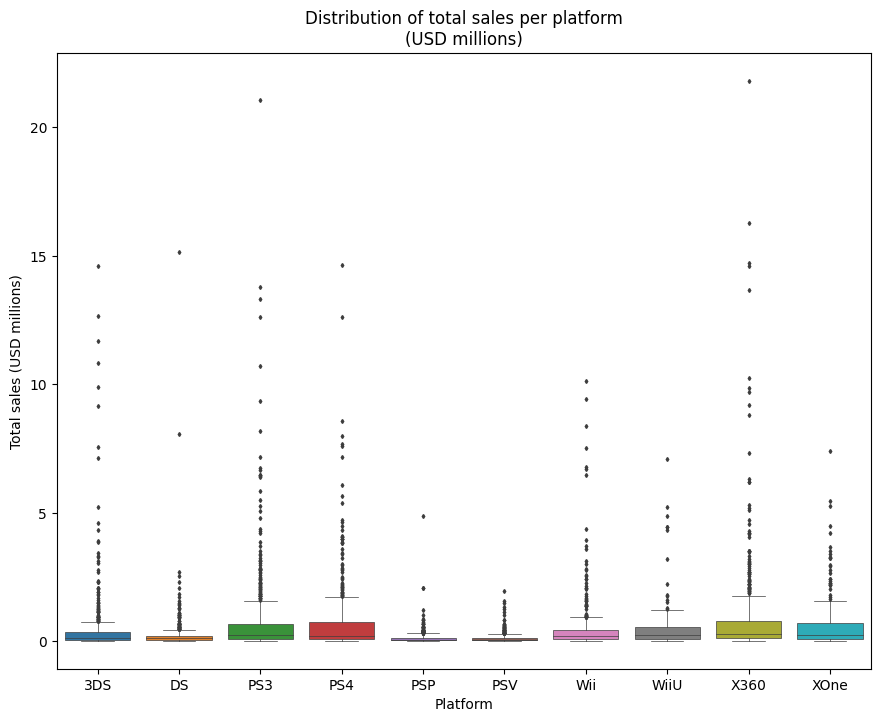

Nota: Las plataformas mostradas corresponden unicamente a aquellas que aún registraban ventas después de 2010


platform
PSV     0.125431
PSP     0.128100
DS      0.244083
Wii     0.495489
3DS     0.503535
WiiU    0.559116
XOne    0.645020
PS3     0.661125
PS4     0.801378
X360    0.809426
Name: total_sales, dtype: float64

Promedio total de ventas: 0.497


In [18]:
# Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma
  
fig, ax = plt.subplots(figsize=(10.5,8))
sns.boxplot(data = current_platforms.sort_values(by = "platform"), x = "platform", y="total_sales", linewidth = 0.5, fliersize = 2)

plt.xlabel("Platform")
plt.ylabel("Total sales (USD millions)")
plt.title("Distribution of total sales per platform\n(USD millions)")
plt.show()

print("Nota: Las plataformas mostradas corresponden unicamente a aquellas que aún registraban ventas después de 2010")
print()
print()
print(current_platforms.groupby("platform")["total_sales"].mean().sort_values())

mean_sales = current_platforms.groupby("platform")["total_sales"].mean().sort_values()
mean_sales = mean_sales.mean()

print()
print(f"Promedio total de ventas: {round(mean_sales,3)}")

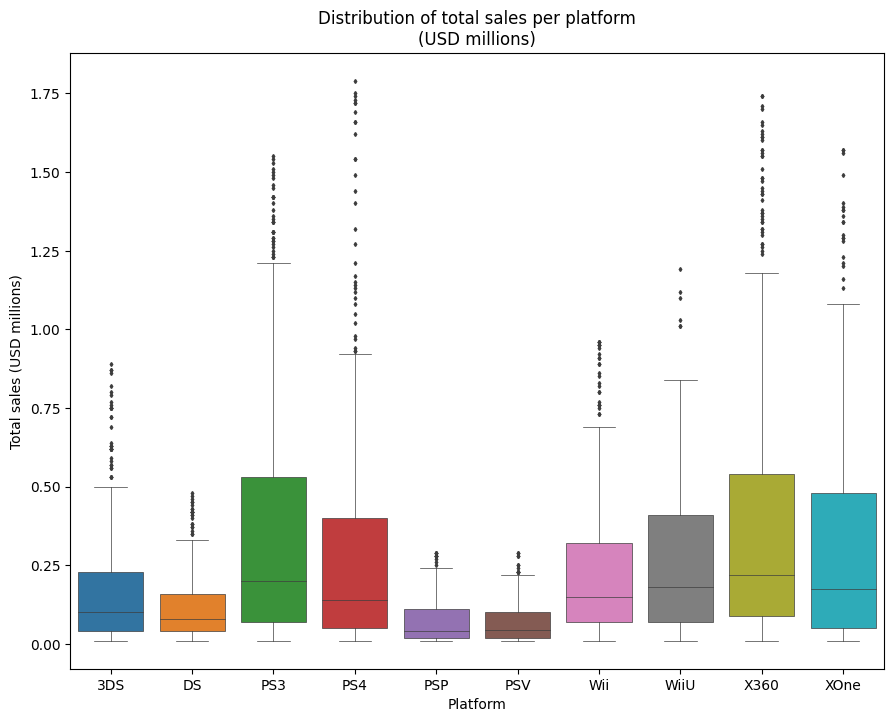

platform
PSV     0.068429
PSP     0.070022
DS      0.117283
3DS     0.175383
Wii     0.233496
WiiU    0.279624
PS4     0.319003
XOne    0.343227
PS3     0.347266
X360    0.386154
Name: total_sales, dtype: float64

Promedio total de ventas: 0.234


In [19]:
stats = current_platforms.groupby("platform")["total_sales"].describe()
stats["IQR"] = stats["75%"] - stats["25%"]
stats["outlier"] = stats["mean"] + 1.5*stats["IQR"]

merged_data = current_platforms.merge(stats, on = "platform", how = "left")

def outlier(row):
    result = row["outlier"] - row["total_sales"]
    if result > 0:
        return 0
    else: 
        return 1
    
merged_data["condition"] = merged_data.apply(outlier, axis = 1)

current_platforms_cleaned = merged_data[merged_data["condition"] == 0]

fig, ax = plt.subplots(figsize=(10.5,8))
sns.boxplot(data = current_platforms_cleaned.sort_values(by = "platform"), x = "platform", y="total_sales", linewidth = 0.5, fliersize = 2)

plt.xlabel("Platform")
plt.ylabel("Total sales (USD millions)")
plt.title("Distribution of total sales per platform\n(USD millions)")
plt.show()

mean_sales = current_platforms_cleaned.groupby("platform")["total_sales"].mean().sort_values()
mean_sales = mean_sales.mean()

print(current_platforms_cleaned.groupby("platform")["total_sales"].mean().sort_values())
print()
print(f"Promedio total de ventas: {round(mean_sales,3)}")

Comentarios:

A partir de la comparación de distribuciones de ventas para cada plataforma, se puede evidenciar que:

1. Para cada una de las plataformas se encontraron un gran número de valores atípicos, lo cuál se podría esperar debido a las constantes propuestas e innovaciones lanzadas por parte de los desarrolladores de juegos cada año
2. Las plataformas PS3, PS4, X360 y XOne tienen comportamientos similares dentro de su rango normal de distribución (sin contar valores atípicos)
3. El promedio de ventas para todas las plataformas es de 0.497 millones de USD al año, ubicando solamente a 5 de las plataformas analizadas por encima de esta cifra
4. De estas 5 plataformas, 2 corresponden a las que anteriormente se han mencionado como las que mejor desempeño han mostrado durante su periodo de actividad (X360, PS3), 2 a las plataformas que se consideran como potencialmente rentables (PS4, Xone) y una que se podría llegar a considerar debido a que su fecha de lanzamiento permite considerarla aún como reciente (WiiU)

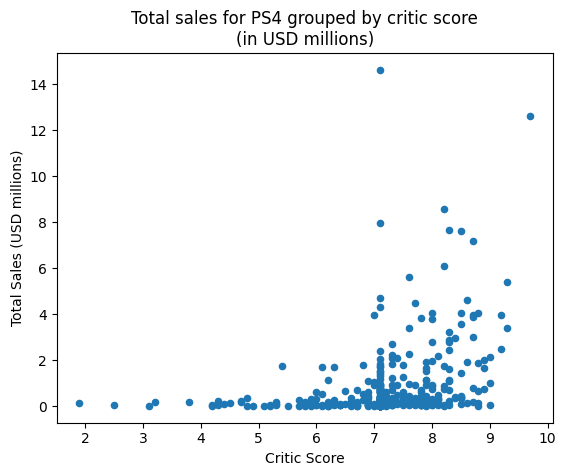

Coeficiente de correlación entre el total de ventas y la puntuación de los críticos para la plataforma PS4: 34.0%




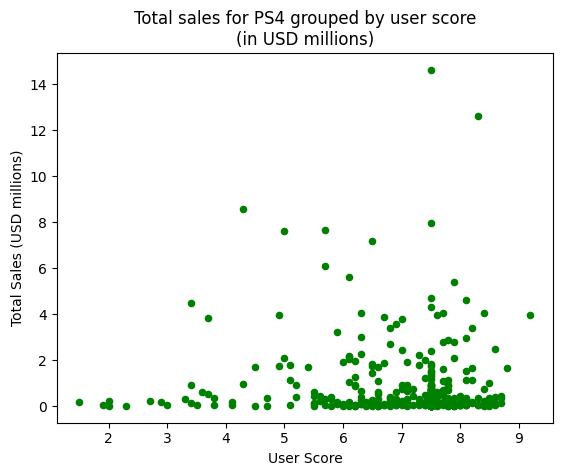

Coeficiente de correlación entre el total de ventas y la puntuación de los usuarios para la plataforma PS4: -6.3%


In [20]:
# Cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección)
#Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones

platform = "PS4"

reviewed_platform = current_platforms[current_platforms["platform"] == platform]


critic = reviewed_platform.plot(x = "critic_score",
                                y = "total_sales",
                                kind = "scatter",
                                xlabel = "Critic Score",
                                ylabel = "Total Sales (USD millions)",
                                title = f"Total sales for {platform} grouped by critic score\n(in USD millions)")

plt.show()

critic_correlation = reviewed_platform["total_sales"].corr(reviewed_platform["critic_score"])
print(f"Coeficiente de correlación entre el total de ventas y la puntuación de los críticos para la plataforma {platform}: {round(critic_correlation,2)*100}%")
print()
print()

user = reviewed_platform.plot(x = "user_score",
                              y = "total_sales",
                              kind = "scatter",
                              color = "g",
                              xlabel = "User Score",
                              ylabel = "Total Sales (USD millions)",
                              title = f"Total sales for {platform} grouped by user score\n(in USD millions)")
plt.show()


user_correlation = reviewed_platform["total_sales"].corr(reviewed_platform["user_score"])
print(f"Coeficiente de correlación entre el total de ventas y la puntuación de los usuarios para la plataforma {platform}: {round(user_correlation,3)*100}%")

Cometarios:

A partir de las distribuciones según las puntuaciones dadas para los juegos de la plataforma analizada, se puede concluir que:

1. El volumen de ventas tiene un nivel medio de correlación positiva respecto a los puntajes otorgados por críticos profesionales. Esto significa que, en cierta medida, entre mejor sea la puntuación que otorgan los críticos profesionales, es mayor la probabilidad de que las ventas de un juego aumenten
2. Por otra parte se logró identificar que la correlación entre el total de ventas y la puntuación dad por los usuarios es muy cercana a 0, lo que implica que es muy poca la influencia que tienen las críticas de los usuarios sobre la percepción y aceptacón en el mercado de un juego

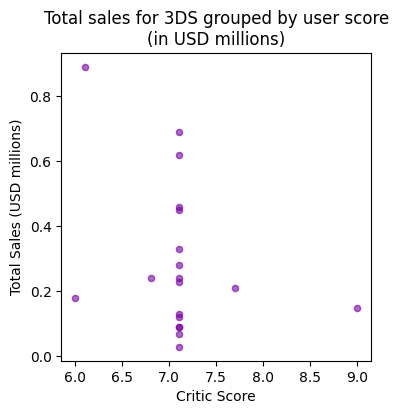

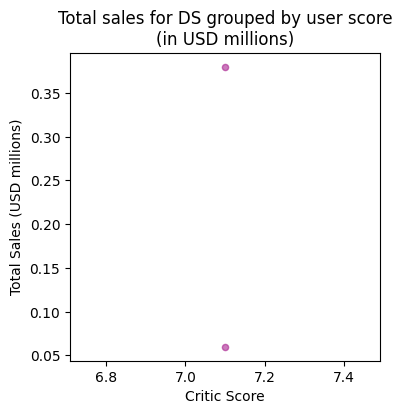

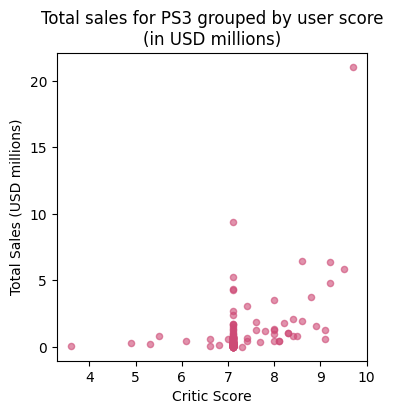

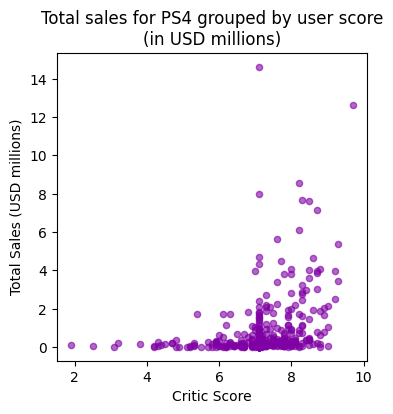

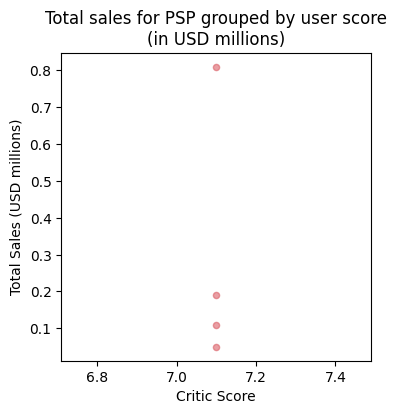

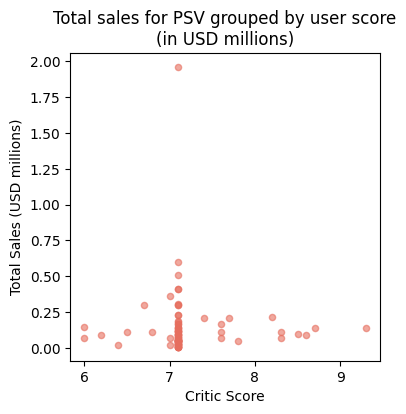

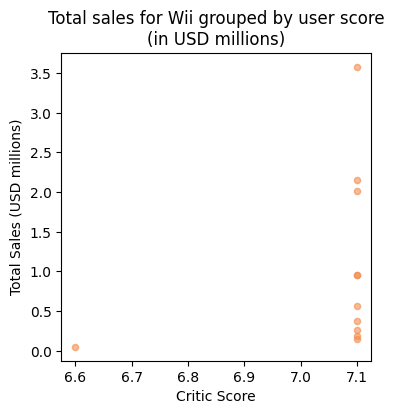

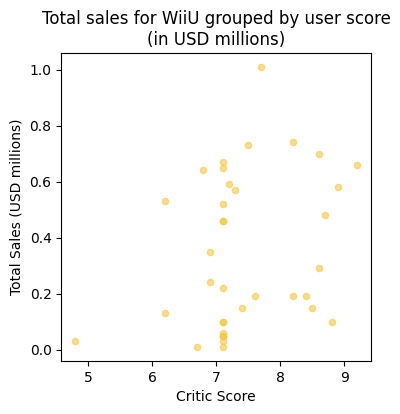

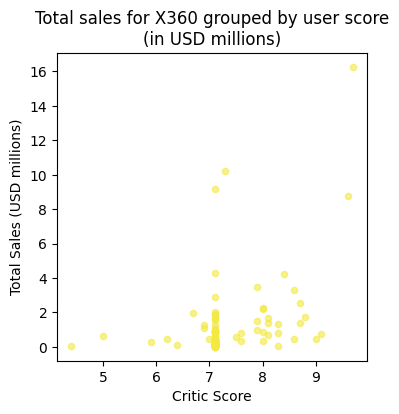

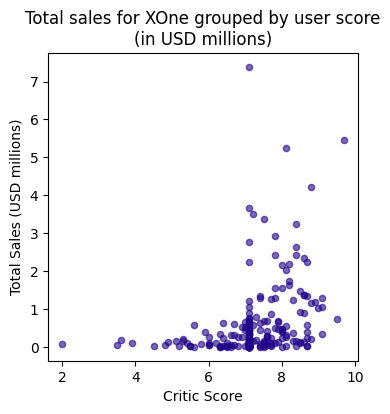

In [21]:
# Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas

reviewed_games = reviewed_platform["name"]

compared_games = current_platforms[current_platforms["name"].isin(reviewed_games)]

colors = {'3DS':"#7700a5", 'DS':"#a92290", 'PS3':"#cd4a75", 'PS4':"#7f00a4", 'PSP':"#db5f67", 
          'PSV':"#e66e5e", 'Wii':"#f28c4d", 'WiiU':"#f9c83f", 'X360':"#f3e941", 'XOne':"#200389"}

names = ['3DS', 'DS', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']

for name in names:
    df_names = compared_games.query("platform == @name")
    df_names.plot(x = "critic_score",
                  y = "total_sales",
                  kind = "scatter", 
                  alpha = 0.6, 
                  color = colors[name],
                  figsize = (4,4),
                  xlabel = "Critic Score",
                  ylabel = "Total Sales (USD millions)",
                  title = f"Total sales for {name} grouped by user score\n(in USD millions)")
    
plt.show()

Comentarios:

1. Las gráficas presentadas corresponden a las ventas de los mismos juegos que se utlizaron en la sección anterior para el calculo con la plataforma escogida
2. Las gráficas que se encuentran vacías corresponden a plataformas cuyos juegos no son compartidos con la plataforma de comparación
3. Se puede evidenciar nuevamente que las plataformas PS3, PS4, X360 y XOne mantienen comportamientos similares, incluso según los juegos que se encuentran disponibles de manera transversal para estas

Cantidad de juegos por genero
Puzzle            99
Strategy         108
Platform         145
Simulation       162
Fighting         192
Racing           204
Shooter          335
Role-Playing     514
Adventure        515
Sports           532
Misc             562
Action          1385
Name: genre, dtype: int64



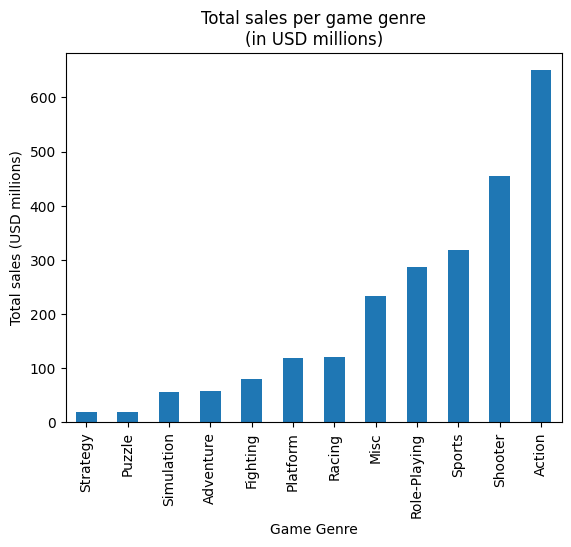

Correlación entre la cantidad de juegos por genero y las ventas totales: 83.0%


In [22]:
# Echa un vistazo a la distribución general de los juegos por género
# Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

game_genre_distribution = current_platforms["genre"].value_counts().sort_values()

print("Cantidad de juegos por genero")
print(game_genre_distribution)
print()

game_genre_sales = current_platforms.groupby("genre")["total_sales"].sum().sort_values()

game_genre_sales.plot(kind = "bar",
                     xlabel = "Game Genre",
                     ylabel = "Total sales (USD millions)",
                     title = "Total sales per game genre\n(in USD millions)")
plt.show()


correlation = game_genre_sales.corr(game_genre_distribution)

print(f"Correlación entre la cantidad de juegos por genero y las ventas totales: {round(correlation,2)*100}%")

Comentarios

A partir de la distribución de ventas según el género del juego se concluye que existe cierta correlación positiva entre las categorias que más juegos producen y las más rentables. Esto implica que, en cierta medida, los tipos de juego que más se producen son también los más rentables 

# 4.1 Perfiles de usuario por región

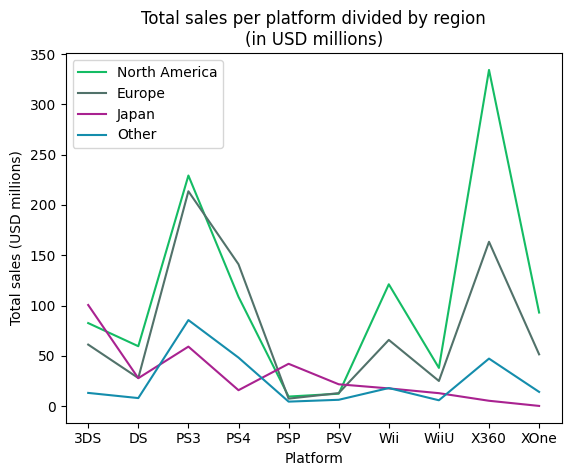

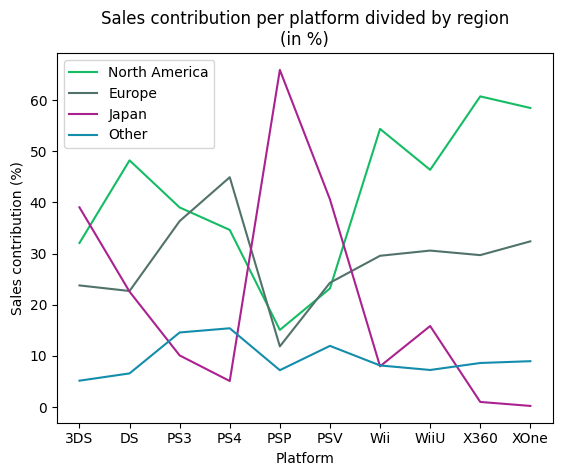

          na_sales  eu_sales  jp_sales  other_sales  total_sales
platform                                                        
3DS          82.65     61.27    100.62        13.27       257.81
DS           59.66     28.06     27.90         8.13       123.75
PS3         229.25    213.60     59.26        85.63       587.74
PS4         108.74    141.09     15.96        48.35       314.14
PSP           9.65      7.59     42.20         4.61        64.05
PSV          12.47     13.07     21.84         6.43        53.81
Wii         121.20     65.91     17.75        18.11       222.97
WiiU         38.10     25.13     13.01         5.95        82.19
X360        334.18    163.41      5.46        47.36       550.41
XOne         93.12     51.59      0.34        14.27       159.32


In [23]:
# Para cada región (NA, UE, JP) determina:

# Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.

colors = {'na_sales':"#14bc64", 'eu_sales':"#51726a", 'jp_sales':"#a92290", 'other_sales':"#148dac"}
regions = ["na_sales", "eu_sales", "jp_sales", "other_sales"]
region_names = {"na_sales": "North America", "eu_sales": "Europe", "jp_sales": "Japan", "other_sales": "Other"}

for region in regions:
    region_platforms = current_platforms.groupby("platform")[region].sum()
    region_platforms.plot(color = colors[region], label = region_names[region])

plt.xticks(ticks = [0,1,2,3,4,5,6,7,8,9], labels = sorted(names))
plt.legend()
plt.xlabel("Platform")
plt.ylabel("Total sales (USD millions)")
plt.title("Total sales per platform divided by region\n(in USD millions)")
plt.show()

for region in regions:
    region_platforms = current_platforms.groupby("platform")[region].sum()*100/current_platforms.groupby("platform")["total_sales"].sum()
    region_platforms.plot(color = colors[region], label = region_names[region])

plt.xticks(ticks = [0,1,2,3,4,5,6,7,8,9], labels = sorted(names))
plt.legend()
plt.xlabel("Platform")
plt.ylabel("Sales contribution (%)")
plt.title("Sales contribution per platform divided by region\n(in %)")
plt.show()

region_platforms = current_platforms.groupby("platform")[["na_sales", "eu_sales", "jp_sales", "other_sales", "total_sales"]].sum()

print(region_platforms)

Comentarios:

1. En la región de Norte América predomina el uso de X360, seguido por PS3. Adicionalmente, esta región es responsable de generar al rededor de 60% y 40% de ventas para estas dos plataformas respectivamente
2. En la región de Europa predomina el uso de PS3 seguido por X360 y PS4, estas últimas dos teniendo un volumen de ventas cercano. Además, esta región es responsable de al rededor del 45% de las ventas de la plataforma PS4
3. La plataforma más popular en Japón es 3DS, seguida por PS3 Y PSP; de hecho es el máximo contribuyente para la plataforma PSP con un porcentaje de al rededor del 65%, muy por encima de cualquier otra región
4. El comportamiento para 3DS es bastante similar para las regiones de Norte America, Europa y Japón
5. A diferencia de otras regiones, las plataformas PS4, X360 y XOne son mucho menos populares en Japón
6. La contribución para Otras regiones del mundo se encuentra entre un 5% y un 15% independiente de la plataforma, mostrando mayor interés por PS3 Y PS4

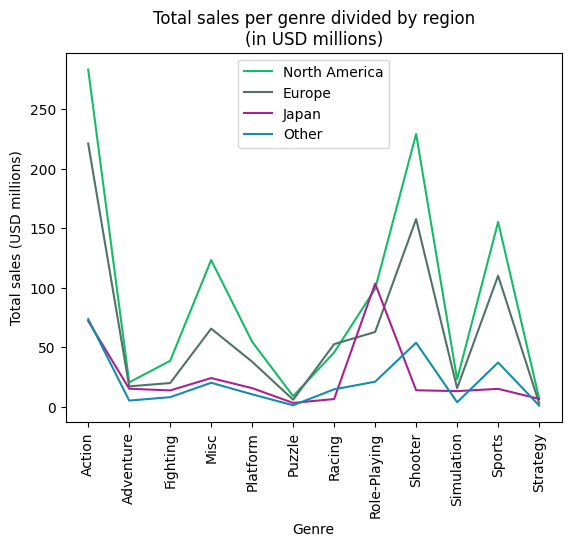

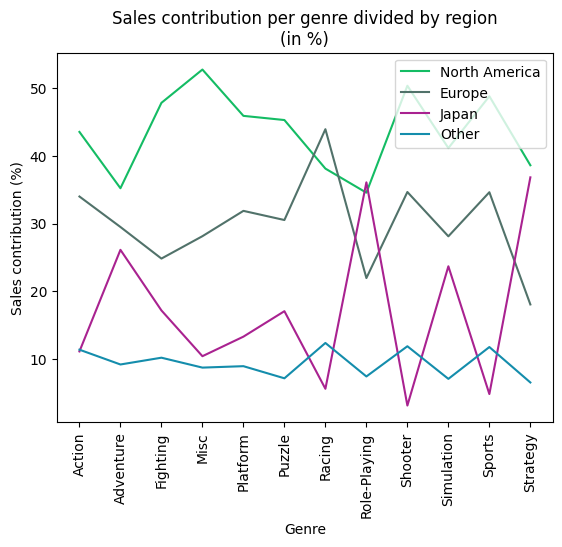

In [24]:
# Para cada región (NA, UE, JP) determina:
# Los cinco géneros principales. Explica la diferencia.

colors = {'na_sales':"#14bc64", 'eu_sales':"#51726a", 'jp_sales':"#a92290", 'other_sales':"#148dac"}
regions = ["na_sales", "eu_sales", "jp_sales", "other_sales"]
region_names = {"na_sales": "North America", "eu_sales": "Europe", "jp_sales": "Japan", "other_sales": "Other"}
genres = ['Misc', 'Action', 'Role-Playing', 'Shooter', 'Racing', 'Platform','Simulation', 'Sports', 'Fighting', 'Adventure', 'Puzzle','Strategy']

for region in regions:
    region_genres = current_platforms.groupby("genre")[region].sum()
    region_genres.plot(color = colors[region], label = region_names[region], rot = 90)

plt.xticks(ticks = [0,1,2,3,4,5,6,7,8,9,10,11], labels = sorted(genres))
plt.legend()
plt.xlabel("Genre")
plt.ylabel("Total sales (USD millions)")
plt.title("Total sales per genre divided by region\n(in USD millions)")
plt.show()

for region in regions:
    region_genres = current_platforms.groupby("genre")[region].sum()*100/current_platforms.groupby("genre")["total_sales"].sum()
    region_genres.plot(color = colors[region], label = region_names[region], rot = 90)

plt.xticks(ticks = [0,1,2,3,4,5,6,7,8,9,10,11], labels = sorted(genres))
plt.legend()
plt.xlabel("Genre")
plt.ylabel("Sales contribution (%)")
plt.title("Sales contribution per genre divided by region\n(in %)")
plt.show()

Comentarios:

1. El comportamiento de todas las regiones es bastante similar según el tipo de juego. Se puede evidenciar que en todas las regiones las categorias de juegos más populares son las mismas
2. Action, Shooter, Sports y Misc son las categorias más populares en todas las regiones
3. La contribución de Norte America es en terminos generales la mayor independiente de la categoría del juego

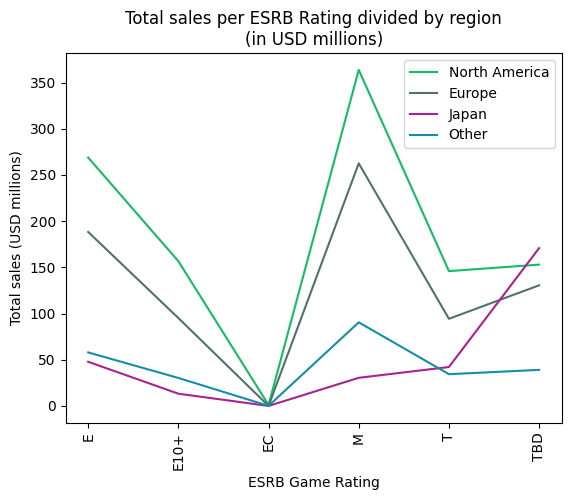

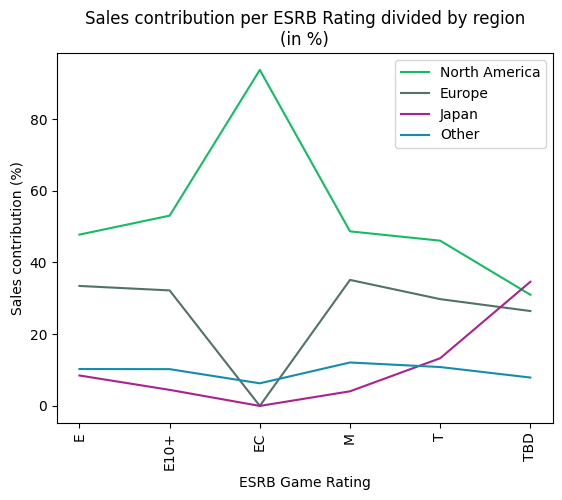

In [25]:
# Si las clasificaciones de ESRB afectan a las ventas en regiones individuales

colors = {'na_sales':"#14bc64", 'eu_sales':"#51726a", 'jp_sales':"#a92290", 'other_sales':"#148dac"}
regions = ["na_sales", "eu_sales", "jp_sales", "other_sales"]
region_names = {"na_sales": "North America", "eu_sales": "Europe", "jp_sales": "Japan", "other_sales": "Other"}
rating = ['E' 'M' 'TBD' 'E10+' 'T' 'EC']

for region in regions:
    region_rating = current_platforms.groupby("rating")[region].sum()
    region_rating.plot(color = colors[region], label = region_names[region], rot = 90)

plt.legend()
plt.xlabel("ESRB Game Rating")
plt.ylabel("Total sales (USD millions)")
plt.title("Total sales per ESRB Rating divided by region\n(in USD millions)")
plt.show()

for region in regions:
    region_rating = current_platforms.groupby("rating")[region].sum()*100/current_platforms.groupby("rating")["total_sales"].sum()
    region_rating.plot(color = colors[region], label = region_names[region], rot = 90)

plt.legend()
plt.xlabel("ESRB Game Rating")
plt.ylabel("Sales contribution (%)")
plt.title("Sales contribution per ESRB Rating divided by region\n(in %)")
plt.show()

Comentarios:

1. Las categorias más populares tanto en Norte America como en Europa son M y E
2. Norte América es prácticamente la única región realmente interesada en comprar juegos de la categoria EC
3. Se considera importante llegar a definir la categoría de los juegos denominados "TBD" puesto que acumulan un volumen importante de ventas independiente de la región
4. Se puede concluir que la categoría de los juegos influye en el nivel de ventas que se generan, pues algunas categorías presentan mayores volumenes de ventas independiente del mercado

# 4.2 Pruebas de hipótesis

In [33]:
# — Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas
stats = df.groupby("platform")["total_sales"].describe()
stats["IQR"] = stats["75%"] - stats["25%"]
stats["outlier"] = stats["mean"] + 1.5*stats["IQR"]

merged_data = df.merge(stats, on = "platform", how = "left")

def outlier(row):
    result = row["outlier"] - row["total_sales"]
    if result > 0:
        return 0
    else: 
        return 1
    
merged_data["condition"] = merged_data.apply(outlier, axis = 1)

df_cleaned = merged_data[merged_data["condition"] == 0]


xone_user_score = df_cleaned.query("(platform == 'XOne') & (user_score > 0)")["user_score"]
pc_user_score = df_cleaned.query("(platform == 'PC') & (user_score > 0)")["user_score"]

alpha = 0.05

print(f"Puntuación media de los usuarios para la plataforma XOne: {round(xone_user_score.mean(),2)}")
print(f"Puntuación media de los usuarios para la plataforma PC: {round(pc_user_score.mean(),2)}")
print()
print(f"Varianza de datos para XOne: {round(np.var(xone_user_score),2)}")
print(f"Varianza de datos para PC: {round(np.var(pc_user_score),2)}")

levene_test = st.levene(xone_user_score,pc_user_score)
print()
print(f"Resultado de Test Levene para definir varianzas iguales: {round(levene_test.pvalue,2)}({round(levene_test.pvalue*100,2)}%)")

if (levene_test.pvalue < alpha):
    print("Hipótesis alternativa: Las varianzas de ambas poblaciones no son iguales")
    equal_var = False
else:
    print("Hipótesis nula: Las varianzas de ambas poblaciones son iguales")
    equal_var = True

results = st.ttest_ind(xone_user_score, pc_user_score, equal_var = equal_var)

print()
print()
print(f"Valor p obtenido de Prueba T: {round(results.pvalue,8)} ({round(results.pvalue*100,4)}%)")
print()

if (results.pvalue < alpha):
    print()
    print("No hay suficiente información que nos permita a aceptar la hipótesis nula")
    print()
    print("Hipótesis alternativa: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son significativamente\ndiferentes")
else:
    print()
    print("El comportamiento de los datos permite aceptar la hipótesis nula")
    print("Hipótesis nula: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC no son significativamente\ndiferentes")

Puntuación media de los usuarios para la plataforma XOne: 6.83
Puntuación media de los usuarios para la plataforma PC: 7.14

Varianza de datos para XOne: 1.55
Varianza de datos para PC: 1.86

Resultado de Test Levene para definir varianzas iguales: 0.78(77.72%)
Hipótesis nula: Las varianzas de ambas poblaciones son iguales


Valor p obtenido de Prueba T: 0.00246017 (0.246%)


No hay suficiente información que nos permita a aceptar la hipótesis nula

Hipótesis alternativa: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son significativamente
diferentes


In [34]:
# — Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

action_score = df_cleaned.query("(genre == 'Action') & (user_score > 0)")["user_score"]
sports_score = df_cleaned.query("(genre == 'Sports') & (user_score > 0)")["user_score"]

alpha = 0.05

print(f"Puntuación media de los usuarios para el género de Acción: {round(action_score.mean(),2)}")
print(f"Puntuación media de los usuarios para el género de Deportes: {round(sports_score.mean(),2)}")
print()
print(f"Varianza de datos para el género de Acción: {round(np.var(action_score),2)}")
print(f"Varianza de datos para el género de Deportes: {round(np.var(sports_score),2)}")


levene_test = st.levene(action_score,sports_score)
print()
print(f"Resultado de Test Levene para definir varianzas iguales: {round(levene_test.pvalue,2)}({round(levene_test.pvalue*100,2)}%)")

if (levene_test.pvalue < alpha):
    print("Hipótesis alternativa: Las varianzas de ambas poblaciones no son iguales")
    equal_var = False
else:
    print("Hipótesis nula: Las varianzas de ambas poblaciones son iguales")
    equal_var = True

   
results = st.ttest_ind(action_score, sports_score, equal_var = equal_var)

print()
print()
print(f"Valor p obtenido de Prueba T: {round(results.pvalue,5)} ({round(results.pvalue*100,2)}%)")
print()

if (results.pvalue < alpha):
    print()
    print("No hay suficiente información que nos permita a aceptar la hipótesis nula")
    print()
    print("Hipótesis alternativa: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son significativamente\ndiferentes")
else:
    print()
    print("El comportamiento de los datos permite aceptar la hipótesis nula")
    print()
    print("Hipótesis nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes no son significativamente\ndiferentes")

Puntuación media de los usuarios para el género de Acción: 7.22
Puntuación media de los usuarios para el género de Deportes: 7.23

Varianza de datos para el género de Acción: 1.14
Varianza de datos para el género de Deportes: 1.27

Resultado de Test Levene para definir varianzas iguales: 0.31(30.73%)
Hipótesis nula: Las varianzas de ambas poblaciones son iguales


Valor p obtenido de Prueba T: 0.63638 (63.64%)


El comportamiento de los datos permite aceptar la hipótesis nula

Hipótesis nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes no son significativamente
diferentes


Comentarios:

1. Se estableció un valor de significación de 5% que representa la porción en la que se puede llegar a aceptar que los resultados no cumplan con los pronósticos de las pruebas
2. En ambas pruebas de hipótesis se realizaron pruebas Levene para determinar si se podía realizar la prueba T con varianzas iguales
3. En ambos casos se realizaron pruebas de muestras independientes (no relacionadas) pues se considera que es poco probable que ambos grupos de poblaciones hayan sido evaluados por el mismo grupo de personas. Caso distinto sería si se estuviera evaluando la puntuación de la crítica, donde si sería valido asumir que existe relación entre las poblaciones
4. Las hipótesis nulas partieron del supuesto que el comportamiento de ambas poblaciones era igual. De la misma manera, la hipótesis alternativa demostraba que dicho comportamiento era significativamente distinto
5. Se pudo demostrar que la puntuación promedio para las plataformas analizadas (XOne y PC) es significativamente diferente
6. Se pudo demostrar que la puntuación promedio para los géneros analizados (Acción y Deportes) tienen comportamientos bastante similares

# 5. Conclusiones

1. Se logró determinar que el periodo promedio de popularidad de las plataformas es de aproximadamente 6 años, mostrando una tendencia mayor para las plataformas lanzadas despues de 2005
2. Se recomienda sectorizar la oferta de videojuegos y plataformas dependiendo de la región del mundo donde se trabaje
2.1 Para el caso de Norte América las plataformas de la línea X (X360 y XOne) presentan mucho mejor comportamiento
2.2 Para el caso de Europa las plataformas PS3 y PS4 son las que presentan mayor interés por parte del público
2.3 La línea 3DS es bastante popular en la región de Japón, seguida por PS3 y PSP. Adicionalmente, Japón es de todos los mercados el que más interés demuestra por la plataforma PSP, esto debido a su contribución de ventas
2.4 Se puede decir de manera generalizada que Action, Shooter, Sports y Misc son las categorias más populares en todas las regiones
3. Se evidenció que la puntuación otorgada por parte de los críticos profesionales puede ser un factor que influya en el volumen de ventas y la popularidad de un juego
4. Se pudo demostrar que las calificaciones promedio de los usuarios para los géneros de Acción y Deportes no son significativamente diferentes, lo cual está bastante relacionado con los niveles de popularidad y ventas por categoría mencionados anteriormente
5. Se considera con base en el análisis que en la actualidad las plataformas con más potencial de ser rentables son XOne y PS4
6. A modo de cierre, aunque se consideraron XOne y PS4 como las plataformas que se consideran recientes y cuyo comportamiento refleja cierta popularidad en la actualidad, cabe mencionar que no se debería descartar el mantener plataformas como X360 y PS3 puesto que su comportamiento histórico y su presencia en los diferentes mercados reflejan un interés por parte del público